<a href="https://colab.research.google.com/github/m0onsoo/daily-magazine/blob/main/img_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
prompt = "An astronaut riding a green horse" # Your prompt here

### Segmind Stable Diffusion 1B (SSD-1B) Model Card
[huggingface_link](https://huggingface.co/segmind/SSD-1B#segmind-stable-diffusion-1b-ssd-1b-model-card)

In [2]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-kjh9o3q_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-kjh9o3q_
  Resolved https://github.com/huggingface/diffusers to commit 29dfe22a8e6f1ea1e1f6cd4fbb8381f08064091e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.25.0.dev0-py3-none-any.whl size=1817691 sha256=a84781d1d899a8d809044ea1d68f12e479661a2f3466cefa71f758fc02737afa
  Stored in directory: /tmp/pip-ephem-wheel-cache-x9jk5jf7/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers


In [3]:
!pip install transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.25.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt = "I think just because you're in the same sport doesn't mean that you have to be friends with everyone just because you're categorized, you're a tennis player, so you're going to get along with tennis players. When I'm on the courts or when I'm on the court playing, I'm a competitor and I want to beat every single person whether they're in the locker room or across the net.So I'm not the one to strike up a conversation about the weather and know that in the next few minutes I have to go and try to win a tennis match. I think everyone just thinks because we're tennis players we should be the greatest of friends."

neg_prompt = "ugly, blurry, poor quality" # Negative prompt here
image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (138 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["in the locker room or across the net. so i'm not the one to strike up a conversation about the weather and know that in the next few minutes i have to go and try to win a tennis match. i think everyone just thinks because we're tennis players we should be the greatest of friends."]
Token indices sequence length is longer than the specified maximum sequence length for this model (138 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["in the locker room or across the net. so i'm not the one to strike up a conversation about the weather and know that in the next few minutes i ha

  0%|          | 0/50 [00:00<?, ?it/s]

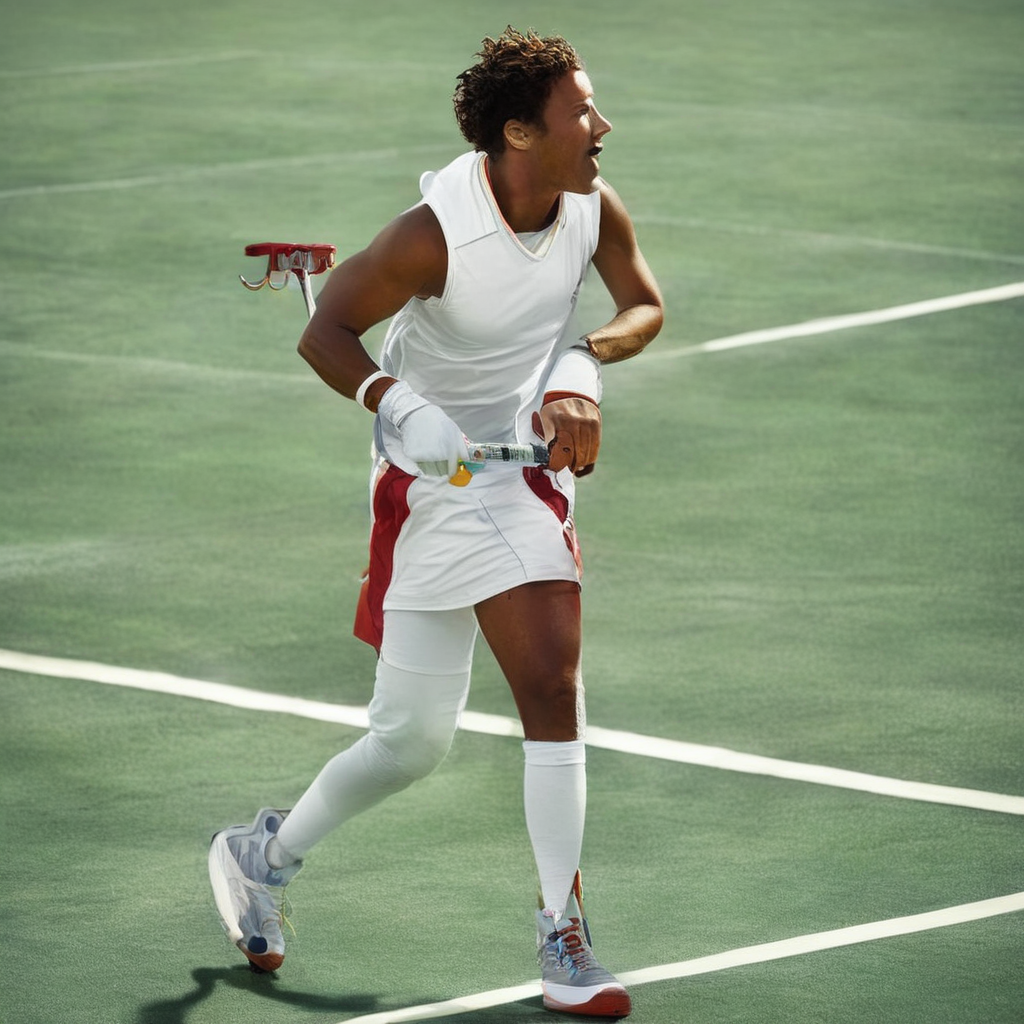

In [ ]:
image

  0%|          | 0/50 [00:00<?, ?it/s]

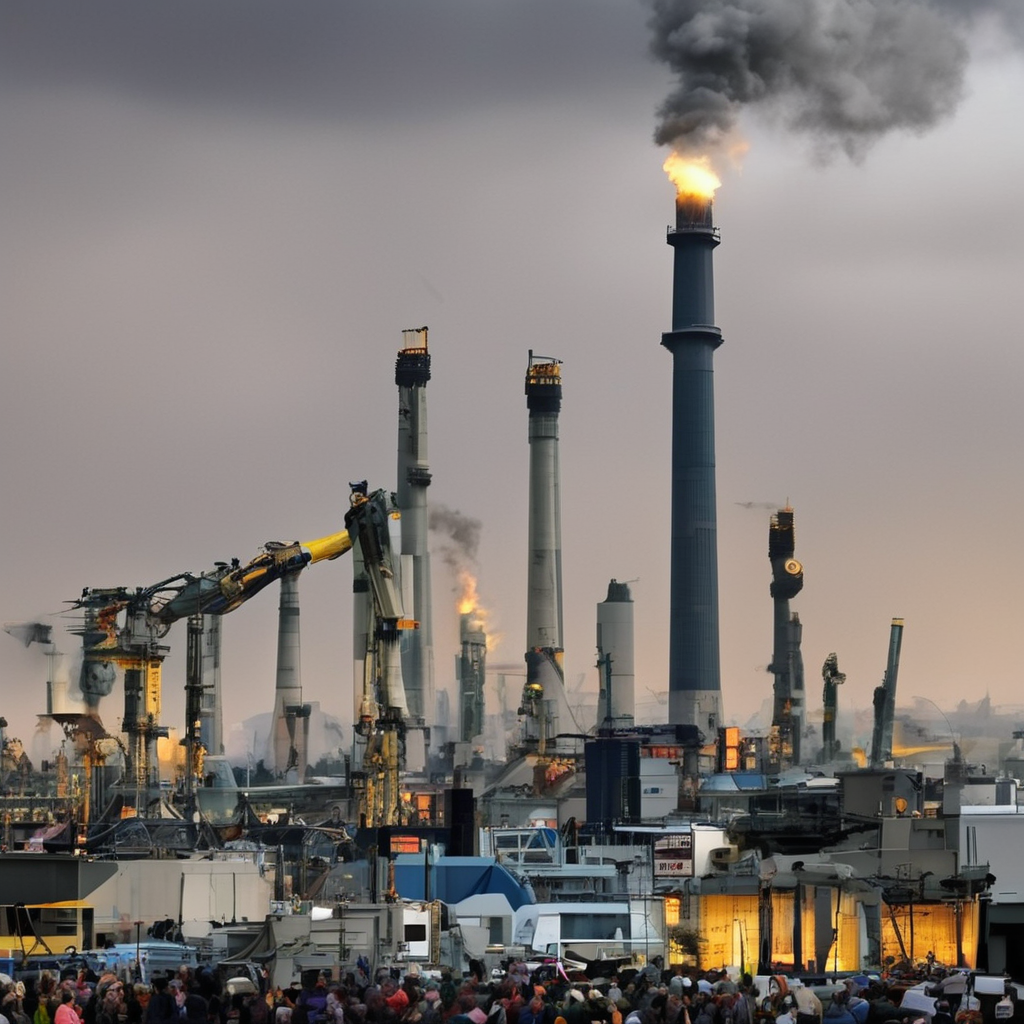

In [ ]:
prompt2 = "Many believe the talks can only be considered a success if they result in a deal to “phase out” all fossil fuels. The language of the final agreement, expected by or around Dec. 12, will be closely monitored. Draft text published in the early hours of Friday appeared to raise the prospect that world leaders could sign off on a deal."

image = pipe(prompt=prompt2).images[0]
image

In [ ]:
test_prompot = "Israeli tanks have breached Gaza's largest hospital complex, according to a journalist inside Al-Shifa. There were gunfire exchanges across the yard, and some of the windows in one of the buildings were out, Al Za’anoun added."

test_image = pipe(prompt=test_prompot, negative_prompt=neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

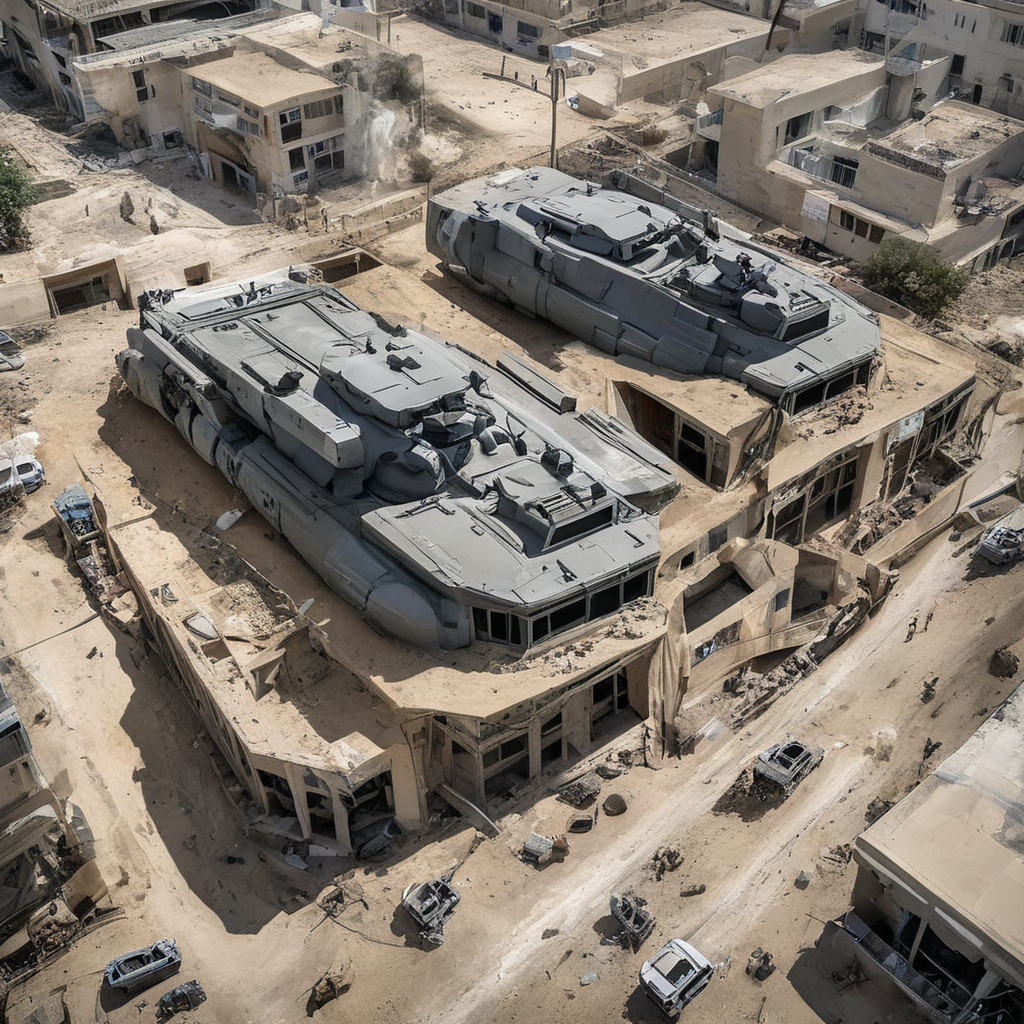

In [ ]:
test_image

In [ ]:
test_prompot2 = "Macy’s has officially kicked off Black Friday early, with a ton of items marked down — way down — across home, beauty and fashion. We’re talking $35 Crocs, Ninja kitchen systems for 50% off and more than $30,000 off a blingy diamond tennis bracelet, if you’re after a luxury gift this holiday season.We’ve rounded up 15 of our favorite picks from the sale, including fashion deals, discounted beauty picks and some home goods to cozy up your living space this winter. Read on for our faves, then shop the rest of the Macy’s early Black Friday deals before the shopping rush begins later this month."

test_image2 = pipe(prompt=test_prompot2, negative_prompt=neg_prompt).images[0]

# 70 토큰 정도로 줄이면 되겠다

Token indices sequence length is longer than the specified maximum sequence length for this model (146 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['this holiday season. we ’ ve rounded up 1 5 of our favorite picks from the sale, including fashion deals, discounted beauty picks and some home goods to cozy up your living space this winter. read on for our faves, then shop the rest of the macy ’ s early black friday deals before the shopping rush begins later this month.']
Token indices sequence length is longer than the specified maximum sequence length for this model (146 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['this holiday season. we ’ ve rounded up 1 5 of our favorite picks from the sale, including fashion de

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
test_image2

# diffusion

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

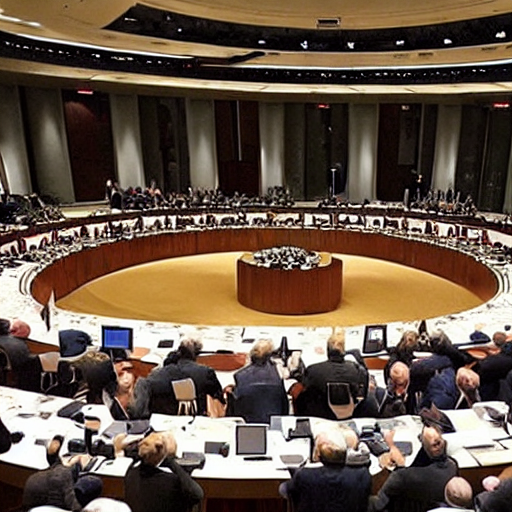

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline("Many believe the talks can only be considered a success if they result in a deal to “phase out” all fossil fuels. The language of the final agreement, expected by or around Dec. 12, will be closely monitored. Draft text published in the early hours of Friday appeared to raise the prospect that world leaders could sign off on a deal.").images[0]

In [ ]:
pipeline("Many believe the talks can only be considered a success if they result in a deal to “phase out” all fossil fuels. The language of the final agreement, expected by or around Dec. 12, will be closely monitored. Draft text published in the early hours of Friday appeared to raise the prospect that world leaders could sign off on a deal.").images[0]

In [4]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32)
pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.25.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

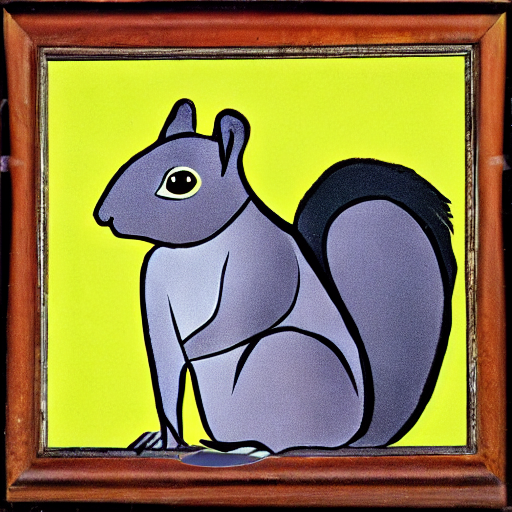

In [5]:
pipeline("An image of a squirrel in Picasso style").images[0]